In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df_Football_Players = pd.read_csv("..\..\data\clean_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df_Football_Players.shape

(9592, 23)

In [4]:
df_Football_Players.head()

,Unnamed: 0,player,team,name,position,height,age,appearance,goals,assists,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
1,8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
2,10,/tyrell-malacia/profil/spieler/339340,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,...,0.000000,0.000000,7132,182,15,3,22000000,22000000,2,1
3,11,/brandon-williams/profil/spieler/507700,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,...,0.000000,0.000000,2686,175,28,1,10000000,12000000,2,1
4,20,/zidane-iqbal/profil/spieler/686845,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0


## Model




### Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------

In [5]:
df_Football_Players = df_Football_Players.drop(['name','player'],axis=1)

In [6]:
categorical_features = df_Football_Players.select_dtypes(include=object).columns
numeric_features = df_Football_Players.select_dtypes(include=np.number).columns
categorical_features

Index(['team', 'position'], dtype='object')

In [7]:
for i in categorical_features:
   print (df_Football_Players[i].value_counts())

team
Daejeon Hana Citizen      46
FC Seoul                  43
Jeonbuk Hyundai Motors    43
Daegu FC                  41
Gangwon FC                41
                          ..
Bayern Munich              6
Gaziantep FK               6
Atlético de Madrid         4
FC Barcelona               4
Real Madrid                3
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1623
Goalkeeper                    1159
Attack Centre-Forward         1145
midfield-CentralMidfield      1009
midfield-DefensiveMidfield     801
Defender Right-Back            791
Defender Left-Back             744
midfield-AttackingMidfield     674
Attack-RightWinger             630
Attack-LeftWinger              620
midfield-RightMidfield          97
midfield-LeftMidfield           93
midfield                        73
Attack                          51
Attack-SecondStriker            49
Defender                        33
Name: count, dtype: int64


In [8]:
# one hot coding for categorical_features
df_Football_Players = pd.get_dummies(df_Football_Players,columns=categorical_features)


In [9]:
df_Football_Players.head()

,Unnamed: 0,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,...,False,False,False,True,False,False,False,False,False,False
1,8,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False
2,10,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,0.000000,...,False,True,False,False,False,False,False,False,False,False
3,11,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,0.0,0.000000,...,False,True,False,False,False,False,False,False,False,False
4,20,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.000000,...,False,False,False,False,False,False,True,False,False,False


In [10]:
df_Football_Players.shape

(9592, 409)

#### 3. Feature selection


In [11]:
correlation = df_Football_Players.corr()
correlation[abs(correlation['current_value']) > 0.17]['current_value'].sort_values(ascending=False)

current_value     1.000000
highest_value     0.823238
appearance        0.434929
minutes played    0.425730
Unnamed: 0       -0.434621
Name: current_value, dtype: float64

In [12]:
# Set the correlation threshold
threshold = 0.17  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['Unnamed: 0', 'appearance', 'minutes played', 'current_value',
       'highest_value'],
      dtype='object')

In [13]:
df_Football_Players = df_Football_Players[selected_features]
df_Football_Players.head()

,Unnamed: 0,appearance,minutes played,current_value,highest_value
0,1,15,1304,1500000,22000000
1,8,34,2758,2000000,2000000
2,10,89,7132,22000000,22000000
3,11,34,2686,10000000,12000000
4,20,39,2788,800000,800000


In [14]:
df_Football_Players.shape

(9592, 5)

### Prepare train and test data


In [15]:
# Prepare data
X = df_Football_Players.drop(['current_value'], axis=1)
y = df_Football_Players['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=99)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X.shape

(9592, 4)

In [17]:
y.shape

(9592,)

### Build the model

In [18]:
# build the model
model = LinearRegression()


In [19]:
# Train the Model
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
# Test the Model
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

In [21]:
# Interpretation of the Model
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients


In [22]:
coeff_df

,Coefficient
Unnamed: 0,-1.089081e+05
appearance,-3.398884e+05
minutes played,6.925362e+05
highest_value,2.925718e+06


In [23]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 2155209.1750293234


#### Evaluating the Model


##### Mean Square Error

In [24]:
# Mean Square Error
y_base = [y_train.mean()] * len(y_test)
#y_base


In [25]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.380613e+13


In [26]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 4.307278e+12
Mean Squared Error for testing: 4.616094e+12



##### Mean Absolute Error


In [27]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 2.298225e+06


In [28]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.097174e+06
Mean Absolute Error for testing: 1.129347e+06


##### Root Mean Squared Error


In [29]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 3.715661e+06


In [30]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 2.075398e+06
Root Mean Squared Error for testing: 2.148510e+06


##### R Square


In [31]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6952297017237956
R Square for testing: 0.6656392882891404


#### Predictions vs. Real Values


In [32]:
predictions = model.predict(X_test_scaled)
predictions

array([6184356.71721054, 8650466.27641835, 1377275.45723496, ...,
        -25552.87534191,  -99869.9794896 , 1601404.90313263])

In [33]:
Real_Values = np.array(y_test)
Real_Values

array([ 900000, 2500000, 1500000, ...,  350000,  175000, 3000000],
      dtype=int64)

## Lasso & Ridge Regression

In [34]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Lasso Regression
lasso_model = Lasso()  # Adjust alpha for regularization strength


# Ridge Regression
ridge_model = Ridge()  # Adjust alpha for regularization strength


In [35]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [36]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for ridge model: {'alpha': 1}
Best Parameters for lasso model: {'alpha': 0}


#### Test the Model

In [37]:
# Predict and evaluate the model

y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

In [38]:
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [39]:
coeff_df_ridge

,Coefficient
Unnamed: 0,-1.090392e+05
appearance,-3.385334e+05
minutes played,6.913330e+05
highest_value,2.925175e+06


In [40]:
coeff_df_lasso

,Coefficient
Unnamed: 0,-1.089081e+05
appearance,-3.398884e+05
minutes played,6.925362e+05
highest_value,2.925718e+06


In [41]:
# Print the intercept of the Models
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 

 Ridge model intercept: 2155209.1750293234
 Lasso model intercept: 2155209.1750293234


### Evaluating the Model

##### Mean Square Error

In [42]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.380613e+13


In [43]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 4.307278e+12
Mean Squared Error for testing ridge model: 4.615893e+12


In [44]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 4.307278e+12
Mean Squared Error for testing lasso model: 4.616094e+12


In [45]:
# MSE Lasso model
mae_train = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.097174e+06
Mean Absolute Error for testing: 1.129347e+06


##### Mean Absolute Error

In [46]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 2.298225e+06


In [47]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 1.097165e+06
Mean Absolute Error for testing ridge model: 1.129323e+06


In [48]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 1.097174e+06
Mean Absolute Error for testing lasso model: 1.129347e+06


##### Root Mean Squared Error

In [49]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 3.715661e+06


In [50]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 2.075398e+06
Root Mean Squared Error for testing ridge model: 2.148463e+06


In [51]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 2.075398e+06
Root Mean Squared Error for testing lasso model: 2.148510e+06


##### R Square

In [52]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.6952296753080738
R Square for testing ridge model: 0.6656538287716707


In [53]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.6952297017237956
R Square for testing lasso model: 0.6656392882891403


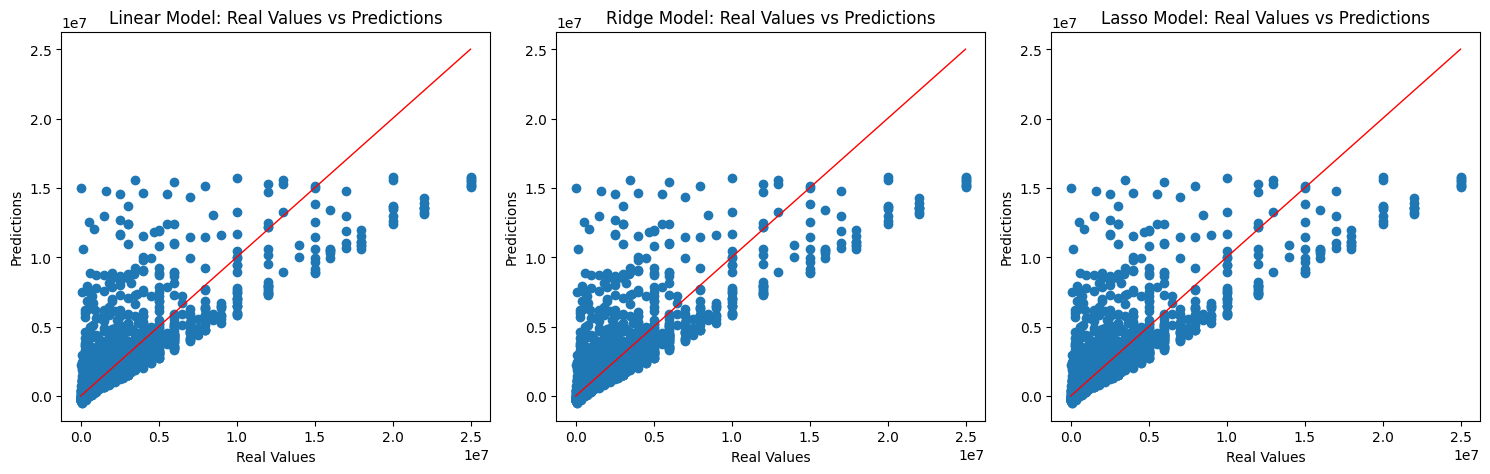

In [54]:
# Linear Model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Linear Model: Real Values vs Predictions')

# Ridge Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Ridge Model: Real Values vs Predictions')

# Lasso Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Lasso Model: Real Values vs Predictions')

plt.tight_layout()
plt.show()

## Residual Histogram


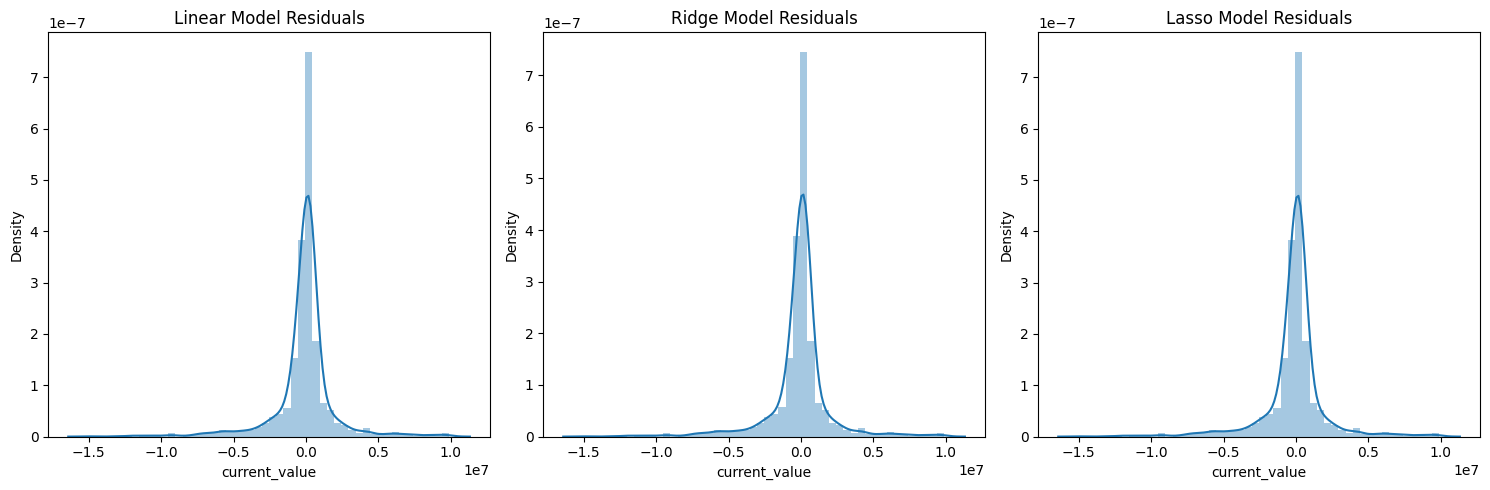

In [55]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.distplot((y_test - y_pred), bins=50)
plt.title('Linear Model Residuals')

plt.subplot(1, 3, 2)
sns.distplot((y_test - y_pred_ridge), bins=50)
plt.title('Ridge Model Residuals')

plt.subplot(1, 3, 3)
sns.distplot((y_test - y_pred_lasso), bins=50)
plt.title('Lasso Model Residuals')

plt.tight_layout()
plt.show()